In [ ]:
U = np.array([0.001*i for i in range(500, 5001)])
U1 = np.zeros(161, dtype = 'float64')
U2 = np.zeros(153, dtype = 'float64')
spectral1 = np.zeros((len(U1), 2638), dtype = 'float64')
spectral2 = np.zeros((len(U2), 2638), dtype = 'float64')
n = 0
for i, u in enumerate(U):
    if path.isfile(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat')==False: continue
    U1[n] = u
    n += 1 
n = 0
for i, u in enumerate(U):
    if path.isfile(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat')==False: continue
    U2[n] = u
    n += 1
    
for i, u in enumerate(U1):
    if path.isfile(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat')==False: continue
    w, A = np.loadtxt(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat', unpack=True, dtype = 'float64')
    spectral1[i] = A
for i, u in enumerate(U2):
    if path.isfile(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat')==False: continue
    w, A = np.loadtxt(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat', unpack=True, dtype = 'float64')
    spectral2[i] = A

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(211, projection='3d')
ax1.grid(False)
ax1.set_ylim(3.5, 1.5)
for i,u in enumerate(U1):
    if i not in [40, 80, 105, 140, 153]: continue
    ax1.plot3D(w, np.tile(U1[i], len(w)), spectral1[i])
    
ax2 = fig.add_subplot(212, projection='3d')
ax2.grid(False)
ax2.set_ylim(3.5, 1.5)
for i,u in enumerate(U2):
    if i not in [8, 25, 70, 80, 120]: continue
    ax2.plot3D(w, np.tile(U2[i], len(w)), spectral2[i])

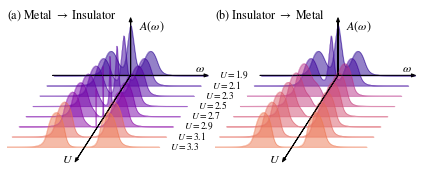

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
from matplotlib import rc

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import os.path as path
import matplotlib.ticker as ticker
from scipy.integrate import simps, trapz

mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# font setting('STIX' font)
#mpl.rcParams["mathtext.fontset"] = "stix"
#mpl.rcParams['mathtext.it'] = 'STIXGeneral:italic'
#mpl.rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'
#mpl.rcParams['legend.handlelength'] = 0
#rc('text', usetex=True)

prefix = ['./NRG_metal_insulator/', './NRG_insulator_metal/']
labels = [r'(a) Metal $\rightarrow$ Insulator',
          r'(b) Insulator $\rightarrow$ Metal']
Uarr = [['1.900', '2.100', '2.300', '2.500', '2.700', '2.900', '3.100', '3.300'],
        ['1.900', '2.100', '2.300', '2.500', '2.700', '2.900', '3.100', '3.300']]
Ucs = [2.9, 2.25]
colors = sns.color_palette("plasma", 20).as_hex()

dx = -0.45
dy = -0.13

ax1 = plt.axes((0, 0, 0.5, 0.5), xticks = [], yticks = [], frameon = False)
ax2 = plt.axes((0.48, 0, 0.5, 0.5), xticks = [], yticks = [], frameon = False)
axs = [ax1, ax2]
shrinkA = 0
shrinkB = 0
for k, ax in enumerate(axs):
    def color_of_phase(U):
        Us = np.array(Uarr[k]).astype('float')
        idx = np.abs(Us-U).argmin()
        cond = int(U <= Ucs[k])
        sign = int(2.0*(cond-0.5))
        idx1 = (1-cond)*(len(Uarr[k]))+sign*idx+(1-cond)*6
        return colors[sign*idx1]

    # z axis
    ax.annotate('', \
      xy = (0.5715, 1.0), \
      xytext = (0.5715, 0.6), \
      xycoords = 'axes fraction', \
      textcoords = 'axes fraction', \
      arrowprops = dict(width = 0.05, headwidth = 3, headlength = 4, color='black', \
          shrinkA = shrinkA, shrinkB = shrinkB), \
      size = 'large', zorder = 1)
    ax.text(0.61, 0.92, r'$A(\omega)$', fontsize = 12, transform = ax.transAxes)

    # x axis
    ax.annotate('', \
      xy = ((len(Uarr[0])*dx+8)/14, 0.0), \
      xytext = (0.5715, 0.6), \
      xycoords = 'axes fraction', \
      textcoords = 'axes fraction', \
      arrowprops = dict(width = 0.05, headwidth = 3, headlength = 4, color='black', \
          shrinkA = shrinkA, shrinkB = shrinkB), \
      size = 'large', zorder = 1)
    ax.text(-0.06+(len(Uarr[0])*dx+8)/14, 0.0, r'$U$', fontsize = 12, transform = ax.transAxes)

    # y axis
    ax.annotate('', \
      xy = (0.93, 0.6), \
      xytext = (0.21, 0.6), \
      xycoords = 'axes fraction', \
      textcoords = 'axes fraction', \
      arrowprops = dict(width = 0.05, headwidth = 3, headlength = 4, color='black', \
          shrinkA = shrinkA, shrinkB = shrinkB), \
      size = 'large', zorder = 1)
    ax.text(0.87, 0.63, r'$\omega$', fontsize = 12, transform = ax.transAxes)

    for i, U in enumerate(Uarr[k]):
        filename = f'Bethe-{U}.dat'
        w, Aw = np.loadtxt(prefix[k] + filename, unpack = True)
        w = w+i*dx
        Aw = Aw+i*dy
        ax.plot(w, Aw, color = color_of_phase(float(U)), linestyle = '-', linewidth = 0.2)
        ax.fill_between(w, i*dy, Aw, color = color_of_phase(float(U)), alpha = 0.5)
        if k == 0:
            ax.text(w[-1]+0.7, Aw[-1]-0.03, r'$U=%.1f$'%float(U), fontsize = 9.5)

    ax.text(0.00, 1.0, labels[k], fontsize = 12, transform = ax.transAxes)
    ax.set_xlim([-8, 6])
    ax.set_ylim([-1.1, 0.735])

plt.savefig('fig1.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05)

In [ ]:
plt.plot(np.arange(10), np.arange(10)**2)
plt.xlabel(r'$a$')